# Analysis of COVID-19 Hospital Data & Air Quality Index #

**by Brandon Vargus**

In March 2020, lockdowns and safety regulations surged to fight against the spread of COVID-19, a then novel, airborne respiratory disease that had put the world on notice.

With people confined in the walls of their homes more than ever, less people on the road, and less people at work, how much was air quality affected, if at all?

**There are three mains questions to analyze:**

1. Did the lockdown result in a noticable improvement in air quality? Most notably in what regions?

2. Is there a correlation between Air Quality Index (AQI) and COVID-19 hospitalization rate?

3. What confounding variables should we control for?

4. How would you present the results visually? How do you label your axes?

5. How did you treat missing data?

**Answers:**

**1.** The lockdown did see noticeable improvement in air quality during the time of the lockdowns, particularly in the Western states (**Section III.ii**). There did not seem to be a statistically significant (p=0.055 > 0.05) long-term decrease in AQI, however, going into 2021 (**Section III.i**).

**2.** There does not seem to be a statistically significant difference (2020: p = 0.673 > 0.05; 2021: 0.831 > 0.05) between the null hypothesis r = 0 and the data, so we can't say there is a correlation between hospitalization rates for COVID-19 and Mean AQI per state for a given year (**Section III.iii**).

   Interestingly enough, there were statistically significant differences between the null hypothesis r = 0 and the data of total number of hospitalizations vs. Mean AQI for a given year. Worse air quality seems to be strongly, positively correlated with more hospitalizations (**Section III.iv**).


**3.** How big each state is/how densely populated each state could be some confounding variables that we would have to consider. Additionally, the season could affect different states, e.g. more wildfires in California during the summer can cause smoke to enter air, worsening the AQI.

**4.** I decided to visualize the results using scatter plots w/simple linear regression, bar plots, histograms, and boxplots. Scatter plots were great for using linear regression (**Section III.iii - Section III.iv**). I used seaborn, scipy, and matplotlib to present my results visually. I labeled my axes by the variable I thought could be the explanation for another, e.g. x = AQI and y = Hospitalizations. For barplots I simply used the variable I want to visualize.

**5.** I treated missing data by getting rid of columns where > 90% of the data was NaN, getting rid of rows that missed crucial information that would be important for analysis (**Section I.ii**). Finally, I changed all the data values encoded as "Missing" or "NaN" to "Unknown", which I felt made the non-entered values more uniform (**Section I.iii**). I then got rid of some info that was also > 90% "Unknown" and kept some entries/columns that could still be useful despite missing data (**Section I.iv**).

## I: Data Cleaning ##

**Section I.i: Taking a look at the data:**

In [1]:
# import our python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Now here we load in our data
aqi_2019_df = pd.read_csv("daily_aqi_by_county_2019.csv")
aqi_2020_df = pd.read_csv("daily_aqi_by_county_2020.csv")
aqi_2021_df = pd.read_csv("daily_aqi_by_county_2021.csv")
covid_cases_df = pd.read_csv("cases.csv")

/var/folders/xq/fj3st__56r54gz9tdvb7d2k40000gn/T/ipykernel_49275/177610922.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_cases_df = pd.read_csv("cases.csv")


In [3]:
aqi_2019_df = pd.read_csv("daily_aqi_by_county_2019.csv")
aqi_2020_df = pd.read_csv("daily_aqi_by_county_2020.csv")
aqi_2021_df = pd.read_csv("daily_aqi_by_county_2021.csv")

In [4]:
# We can display each type of our csv's to see what we're working with
aqi_2021_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-04,47,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1


In [5]:
# how much data we're working with
print(len(aqi_2021_df))

218196


In [6]:
covid_cases_df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AR,5.0,BOONE,5009.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
1,2021-10,MO,29.0,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
2,2020-10,MO,29.0,CASS,29037.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47.0,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-11,GA,13.0,EFFINGHAM,13103.0,0 - 17 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN


In [7]:
# how much data we're working with
print(len(covid_cases_df))

37532072


For the Air Quality Index (AQI) columns, the sense of scale of what is considered "good" vs. "moderate" isn't clear; I don't know if a higher number is better or worse.

I found the official Air Now government website AQI index indicates a lower score, on a scale of 0-500, is better:
https://www.airnow.gov/aqi/aqi-basics/

The most relevant data to see if air-quality improved/plateaued/worsened starts at 2019, before government lockdowns. If needed, we can average the values across previous years up to 2019.

2020 and 2021 will be the focal point for comparison against data from 2019.

**Section I.ii: Time to clean some of the missing data from the covid_cases_df:**

The issue here is now getting rid of the columns/entries where the data that is missing is not relevant or can not be used to make defintive conclusions.

That would be entries where the county of residence, res_county, is missing/NaN. We need the res_county because we'll use that data later on to compare the air quality in that county to what proportion of residents were hospitalized for COVID-19.

Additionally, other entries have columns coded as "missing" when the info was not provided, according to the data dictionary for this dataset: https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4/about_data.

In [8]:
covid_cases_df.isna().sum()

case_month                               12
res_state                               920
state_fips_code                         920
res_county                          2561284
county_fips_code                    2561284
age_group                            406634
sex                                 1244276
race                                6597416
ethnicity                           7837672
case_positive_specimen_interval    25113195
case_onset_interval                20221411
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                            1752914
underlying_conditions_yn           35206303
dtype: int64

In [9]:
# we'll get rid of the columns case_positive_specimen_interval and case_onset_interval
# since these columns only describe specific information for the patient.
# we'll need more abstract data regarding patients as a whole, not for each individual.
covid_cases_df = covid_cases_df.drop("case_positive_specimen_interval", axis=1)
covid_cases_df = covid_cases_df.drop("case_onset_interval", axis=1)

In [10]:
# we'll also get rid of underlying conditions since at least ~94.6% of the entries at NaN/missing
covid_cases_df = covid_cases_df.drop("underlying_conditions_yn", axis=1)

In [11]:
# we can also get rid of fips codes since they won't be necessary
# and we can get rid of patient data where their state is not known
covid_cases_df["res_state"].dropna(inplace=True)
covid_cases_df = covid_cases_df.drop("county_fips_code", axis=1)

In [12]:
# we probably don't need to know if the person probably had COVID-19,
# only if they had a "Laboratory-confirmed case"
# we'll drop the rows where it is "Probable Case" and then drop the current_status column
covid_cases_df.drop(covid_cases_df[covid_cases_df["current_status"]=="Probable case"].index, inplace=True)
covid_cases_df = covid_cases_df.drop("current_status", axis=1)

**Section I.iii: Dealing with Missing values:**

Now we have to deal with the data labeled as "Missing". These are basically NaN/Unknown values, but were only coded as such when the data wasn't provided by the patient. I'll change these values to "Unknown" because I think it'll be slighltly more descriptive for someone that hasn't looked at the data dictionary.

Then we'll gauge how much of the data is labeled "Unknown" and go from there.

In [13]:
# where sex is NaN, fill with "Unknown"
covid_cases_df["sex"].fillna("Unknown", inplace=True)
covid_cases_df["sex"].replace("Missing", "Unknown", inplace=True)

In [14]:
# we'll do the same w/race, ethnicity, and age_group
covid_cases_df["race"].fillna("Unknown", inplace = True)
covid_cases_df["race"].replace("Missing", "Unknown", inplace=True)

covid_cases_df["ethnicity"].fillna("Unknown", inplace = True)
covid_cases_df["ethnicity"].replace("Missing", "Unknown", inplace=True)

covid_cases_df["age_group"].fillna("Unknown", inplace = True)
covid_cases_df["age_group"].replace("Missing", "Unknown", inplace=True)

In [15]:
# we can also get rid of process and symptom_status since keeping both doesn't change the fact
# the patient was declared potentially sick in the first place
covid_cases_df.drop(labels=["process", "symptom_status"], axis=1, inplace=True)

In [16]:
# we can do this with the rest of the data now
covid_cases_df["exposure_yn"].replace("Missing", "Unknown", inplace=True)

covid_cases_df["hosp_yn"].replace("Missing", "Unknown", inplace=True)

covid_cases_df["icu_yn"].replace("Missing", "Unknown", inplace=True)

covid_cases_df["death_yn"].fillna("Unknown", inplace = True)
covid_cases_df["death_yn"].replace("Missing", "Unknown", inplace=True)

In [17]:
covid_cases_df["case_month"].fillna("Unknown", inplace = True)
covid_cases_df["res_state"].fillna("Unknown", inplace = True)
covid_cases_df["res_county"].fillna("Unknown", inplace = True)
covid_cases_df["state_fips_code"].fillna("Unknown", inplace = True)

**Section I.iv**

In [18]:
# how much data is labeled as Unknown?

denominator = len(covid_cases_df)
is_unknown = {}
for col in covid_cases_df:
    is_unknown[col] = covid_cases_df[col].value_counts()["Unknown"]

print(is_unknown)

{'case_month': 12, 'res_state': 920, 'state_fips_code': 920, 'res_county': 2561284, 'age_group': 761547, 'sex': 1525542, 'race': 14734851, 'ethnicity': 17400001, 'exposure_yn': 35113152, 'hosp_yn': 20215271, 'icu_yn': 35543535, 'death_yn': 23880332}


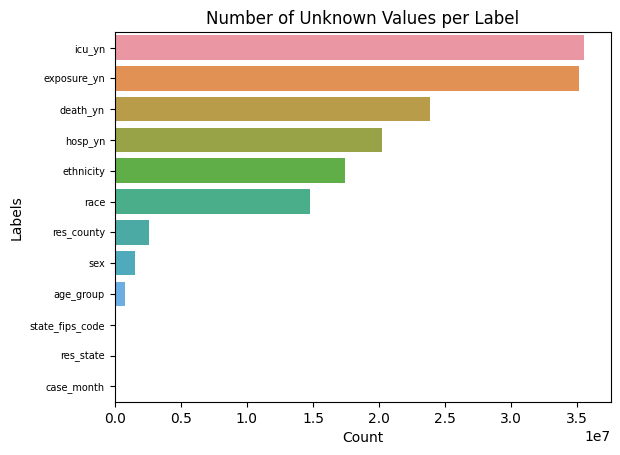

In [19]:
# put keys and values into arrays so they are ordered
labels = list(is_unknown.keys())
# each value for each key
counts = [is_unknown[k] for k in labels]

labels = [label for label, _ in sorted(zip(labels, counts), key=lambda pair: pair[1])]
# put in to descending order
labels.reverse()
# put in to descending order
counts.sort(reverse=True)

my_plot = sns.barplot(x=counts, y=labels)
    
plt.title("Number of Unknown Values per Label")
plt.ylabel("Labels")
plt.yticks(fontsize=7)
plt.xlabel("Count")
plt.xlim(0, len(covid_cases_df))
plt.show()

Now based on these numbers we can determine if we want to get rid of some of the columns or row associate with them:

- The columns "icu_yn" and "exposure_yn" have so many missing values that it does not make sense to keep them.

- Deaths compose a large part of the data and could be valuable for later analysis. We'll keep them for now just in case.

- Race, ethnicity, and sex could be used later, though they aren't immediately useful

- The columns res_county, age_group, and res_state will all be useful, but they have some unknown values.

- Whether patients were hospitalized or not could also be useful for later, so we'll keep it for now. 

In [20]:
covid_cases_df.drop(labels=["icu_yn", "exposure_yn"], axis=1, inplace=True)

In [21]:
covid_cases_df = covid_cases_df[covid_cases_df["age_group"]!="Unknown"]
covid_cases_df = covid_cases_df[covid_cases_df["res_county"]!="Unknown"]
covid_cases_df = covid_cases_df[covid_cases_df["res_state"]!="Unknown"]

In [22]:
# # lower case so it is the same as county Name in the AQI dataframes
# for i in range(len(covid_cases_df)):
#     covid_cases_df["res_county"].iloc[i] = covid_cases_df["res_county"].iloc[i].lower()

In [23]:
covid_cases_df.head()

,case_month,res_state,state_fips_code,res_county,age_group,sex,race,ethnicity,hosp_yn,death_yn
0,2020-12,AR,5.0,BOONE,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown
1,2021-10,MO,29.0,PHELPS,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown
2,2020-10,MO,29.0,CASS,0 - 17 years,Female,Unknown,Unknown,Unknown,Unknown
3,2021-08,TN,47.0,CLAIBORNE,0 - 17 years,Female,Unknown,Unknown,Unknown,Unknown
4,2020-11,GA,13.0,EFFINGHAM,0 - 17 years,Female,Unknown,Unknown,Unknown,Unknown


**Section I.v: Next up: cleaning up AQI index dataframes:**

In [24]:
aqi_2019_df.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [25]:
aqi_2020_df.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [26]:
aqi_2021_df.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

Thankfully, there is no missing data!

In [27]:
aqi_2020_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [28]:
# get rid of unnecessary columns:
aqi_dfs = [aqi_2019_df, aqi_2020_df, aqi_2021_df]

for df in aqi_dfs:
    df.drop(labels=["County Code", "Defining Site", "Number of Sites Reporting"], axis=1, inplace=True)

## II: Data Processing ##

**Section II.i**

Now we're going to start to combine some of the features from the datasets into a separate dataframe that will be easier to process. This dataframe will be used later for models that can help answer our main questions.

We'll also try to figure out hospitalization rates for each state.

There is also the issue that the covid_cases_df and the AQI df's don't use the same coding for states. We'll see if we can use those state codes, but if we can't, then we'll just change the state abbreviations in the covid_cases_df to the actual state name.

In [29]:
# See if we can use the state codes
for state in aqi_2019_df["State Name"].unique():
    print(state, aqi_2019_df.loc[aqi_2019_df["State Name"] == state, "State Code"].unique())

Alabama [1]
Alaska [2]
Arizona [4]
Arkansas [5]
California [6]
Colorado [8]
Connecticut [9]
Country Of Mexico [80]
Delaware [10]
District Of Columbia [11]
Florida [12]
Georgia [13]
Hawaii [15]
Idaho [16]
Illinois [17]
Indiana [18]
Iowa [19]
Kansas [20]
Kentucky [21]
Louisiana [22]
Maine [23]
Maryland [24]
Massachusetts [25]
Michigan [26]
Minnesota [27]
Mississippi [28]
Missouri [29]
Montana [30]
Nebraska [31]
Nevada [32]
New Hampshire [33]
New Jersey [34]
New Mexico [35]
New York [36]
North Carolina [37]
North Dakota [38]
Ohio [39]
Oklahoma [40]
Oregon [41]
Pennsylvania [42]
Puerto Rico [72]
Rhode Island [44]
South Carolina [45]
South Dakota [46]
Tennessee [47]
Texas [48]
Utah [49]
Vermont [50]
Virgin Islands [78]
Virginia [51]
Washington [53]
West Virginia [54]
Wisconsin [55]
Wyoming [56]


In [30]:
# See if we can use the state codes
for state in covid_cases_df["res_state"].unique():
    print(state, covid_cases_df.loc[covid_cases_df["res_state"] == state, "state_fips_code"].unique())

AR [5.0]
MO [29.0]
TN [47.0]
GA [13.0]
OH [39.0]
NY [36.0]
MN [27.0]
IL [17.0]
SC [45.0]
WI [55.0]
MI [26.0]
CO [8.0]
FL [12.0]
IA [19.0]
NH [33.0]
VA [51.0]
PA [42.0]
OR [41.0]
ME [23.0]
AL [1.0]
AZ [4.0]
CT [9.0]
NM [35.0]
NC [37.0]
KS [20.0]
MT [30.0]
MS [28.0]
CA [6.0]
KY [21.0]
MD [24.0]
IN [18.0]
WA [53.0]
TX [48.0]
AK [2.0]
MA [25.0]
OK [40.0]
NE [31.0]
UT [49.0]
VT [50.0]
SD [46.0]
NJ [34.0]
WY [56.0]
RI [44.0]
DE [10.0]
ID [16.0]
NV [32.0]
HI [15.0]
ND [38.0]
WV [54.0]
LA [22.0]


**Section II.ii**

It turns out that the "State Code" in the AQI index dataframes is the same as the "state_fips_code" in the covid_cases_df. This makes some of the data processing easier! We'll base the values for hospitalizations and AQI statistics on the state_fips_code values.

Here's the plan:
1. First, we'll get rid of the states not shared by both dataframes, which included Guam (GU), nan [], and the Country of Mexico (80). 
2. Then we'll cast the State Codes to floats.
3. We'll add info about the states into the model_states_df via the state codes.

Step 1:

In [31]:
covid_cases_df["state_fips_code"].dropna(inplace=True)
covid_cases_df = covid_cases_df[covid_cases_df["state_fips_code"] != 'GU']

In [32]:
aqi_2019_df = aqi_2019_df[aqi_2019_df["State Code"] != 80]
aqi_2020_df = aqi_2020_df[aqi_2020_df["State Code"] != 80]
aqi_2021_df = aqi_2021_df[aqi_2021_df["State Code"] != 80]

Step 2:

In [33]:
aqi_dfs = [aqi_2019_df, aqi_2020_df, aqi_2021_df]

for df in aqi_dfs:
    for i in range(len(df)):
        df["State Code"].iloc[i] = float(df["State Code"].iloc[i])

/var/folders/xq/fj3st__56r54gz9tdvb7d2k40000gn/T/ipykernel_49275/1378819043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State Code"].iloc[i] = float(df["State Code"].iloc[i])


Step 3:

In [34]:
# get states
states = aqi_2019_df["State Name"].unique()
# get state codes
codes = []
for state in aqi_2019_df["State Name"].unique():
    codes += [float(aqi_2019_df.loc[aqi_2019_df["State Name"] == state, "State Code"].unique())]

model_states_df = pd.DataFrame(states, columns = ["State"])
model_states_df["State Code"] = codes

In [35]:
model_states_df.head()

,State,State Code
0,Alabama,1.0
1,Alaska,2.0
2,Arizona,4.0
3,Arkansas,5.0
4,California,6.0


We can also add the region of each state to make visualizations later based on general geographic area in the United States:

- **Non-continental**: Puerto Rico, D.C, and the Virgin Islands (not part of the continental United States and Hawaii, also D.C)
- **Northeast**: Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, and Vermont
- **Midwest**: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, and Wisconsin
- **South**: Alabama, Arkansas, Delaware, District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia
- **West**: Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, and Wyoming

Based on:
https://www.cdc.gov/nchs/hus/sources-definitions/geographic-region.htm

In [36]:
non_continental = ["Puerto Rico", "Virgin Islands", "District Of Columbia"]
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"]
midwest = ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
south = ["Alabama", "Arkansas", "Delaware", "District of Columbia", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"]
west = ["Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"]

def add_region(df):
    geographic_region = []
    for state_name in df["State"].unique():
        if state_name in non_continental:
            geographic_region += ["Non-Continental"]
        elif state_name in northeast:
            geographic_region += ["Northeast"]
        elif state_name in midwest:
            geographic_region += ["Midwest"]
        elif state_name in south:
            geographic_region += ["South"]
        elif state_name in west:
            geographic_region += ["West"]
            
    return geographic_region
        

model_states_df["Region"] = add_region(model_states_df)


In [37]:
model_states_df.head()

,State,State Code,Region
0,Alabama,1.0,South
1,Alaska,2.0,West
2,Arizona,4.0,West
3,Arkansas,5.0,South
4,California,6.0,West


We can also calculate the rate of hospitalizations per state:

In [38]:
s_df = covid_cases_df[covid_cases_df["state_fips_code"] == 5.0]
# access year a hospitalization occurred
s_df["case_month"].str[:4]

0           2020
48          2020
69          2021
74          2021
76          2021
            ... 
23087287    2021
23087416    2021
23087594    2021
23087724    2021
23087904    2021
Name: case_month, Length: 297983, dtype: object

In [39]:
h_rate_2020 = []
h_rate_2021 = []
hospitalizations_2020 = []
hospitalizations_2021 = []

# maybe use a pandas groupby
for state_code in model_states_df["State Code"].unique():
    state_code_df = covid_cases_df[covid_cases_df["state_fips_code"] == state_code]
    state_code_df_2020 = state_code_df[state_code_df["case_month"].str[:4] == "2020"]
    state_code_df_2021 = state_code_df[state_code_df["case_month"].str[:4] == "2021"]
    
    hosp_y_2020 = len(state_code_df_2020[state_code_df_2020["hosp_yn"]=="Yes"])
    hosp_n_2020 = len(state_code_df_2020[state_code_df_2020["hosp_yn"]=="No"])
#     hosp_unknown_2020 = len(state_code_df_2020[state_code_df_2020["hosp_yn"]=="Unknown"])
    if (hosp_n_2020 + hosp_y_2020) > 0:
        h_rate_2020 += [hosp_y_2020 / (hosp_n_2020 + hosp_y_2020)]
        hospitalizations_2020 += [hosp_y_2020]
    else:
        h_rate_2020 += [0]
        hospitalizations_2020 += [0]
        
    hosp_y_2021 = len(state_code_df_2021[state_code_df_2021["hosp_yn"]=="Yes"])
    hosp_n_2021 = len(state_code_df_2021[state_code_df_2021["hosp_yn"]=="No"])
#     hosp_unknown_2021 = len(state_code_df_2021[state_code_df_2021["hosp_yn"]=="Unknown"])
    if (hosp_n_2021 + hosp_y_2021) > 0:
        h_rate_2021 += [hosp_y_2021 / (hosp_n_2021 + hosp_y_2021)]
        hospitalizations_2021 += [hosp_y_2021]
    else:
        h_rate_2021 += [0]
        hospitalizations_2021 += [0]

In [40]:
covid_cases_df["case_month"].unique()

array(['2020-12', '2021-10', '2020-10', '2021-08', '2020-11', '2021-04',
       '2021-09', '2021-01', '2020-09', '2020-07', '2021-02', '2020-06',
       '2020-08', '2021-05', '2021-06', '2021-03', '2021-07', '2020-05',
       '2020-04', '2020-03', '2020-02', '2020-01'], dtype=object)

In [41]:
model_states_df["Hospitalizations 2020"] = hospitalizations_2020
model_states_df["Hospitalization Rate 2020"] = h_rate_2020

model_states_df["Hospitalizations 2021"] = hospitalizations_2021
model_states_df["Hospitalization Rate 2021"] = h_rate_2021

# sanity checks, like checking if the number we're getting line up
# with calculating it ourselves

model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021
0,Alabama,1.0,South,7708,0.075836,5646,0.075903
1,Alaska,2.0,West,885,0.246587,1279,0.220822
2,Arizona,4.0,West,54006,0.187311,37953,0.145523
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238
4,California,6.0,West,149121,0.082321,100220,0.074207


Here we'll calculate the mean AQI for each state:

In [42]:
# now we'll get the average aqi index per state for each year: 2019, 2020, and 2021.
def calculate_aqi_stats(df):
    mean_aqi = []
    total_aqi = []
    number_reports = []
    # make sure the stats are in the correct order of states
    for state_code in model_states_df["State Code"].unique():
        aqi = 0
        reports = 0
        for i in range(len(df)):
            if df["State Code"].iloc[i] == state_code:
                aqi += df["AQI"].iloc[i]
                reports += 1
        mean_aqi += [round(aqi / reports, 2)]
        total_aqi += [aqi]
        number_reports += [reports]
    
    return [mean_aqi, total_aqi, number_reports]

#2019
[mean_aqi_2019, total_aqi_2019, number_reports_2019] = calculate_aqi_stats(aqi_2019_df)
aqi_stats_2019 = [mean_aqi_2019, total_aqi_2019, number_reports_2019]

#2020
[mean_aqi_2020, total_aqi_2020, number_reports_2020] = calculate_aqi_stats(aqi_2020_df)
aqi_stats_2020 = [mean_aqi_2020, total_aqi_2020, number_reports_2020]

#2021
[mean_aqi_2021, total_aqi_2021, number_reports_2021] = calculate_aqi_stats(aqi_2021_df)
aqi_stats_2021 = [mean_aqi_2021, total_aqi_2021, number_reports_2021]

In [43]:
model_states_df["2019 Mean AQI per State"] = aqi_stats_2019[0]
model_states_df["2020 Mean AQI per State"] = aqi_stats_2020[0]
model_states_df["2021 Mean AQI per State"] = aqi_stats_2021[0]

model_states_df["2019 Total AQI per State"] = aqi_stats_2019[1]
model_states_df["2020 Total AQI per State"] = aqi_stats_2020[1]
model_states_df["2021 Total AQI per State"] = aqi_stats_2021[1]

model_states_df["2019 Number of Reports per State"] = aqi_stats_2019[2]
model_states_df["2020 Number of Reports per State"] = aqi_stats_2020[2]
model_states_df["2021 Number of Reports per State"] = aqi_stats_2021[2]

model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021,2019 Mean AQI per State,2020 Mean AQI per State,2021 Mean AQI per State,2019 Total AQI per State,2020 Total AQI per State,2021 Total AQI per State,2019 Number of Reports per State,2020 Number of Reports per State,2021 Number of Reports per State
0,Alabama,1.0,South,7708,0.075836,5646,0.075903,40.34,37.39,38.39,199061,162250,111483,4934,4339,2904
1,Alaska,2.0,West,885,0.246587,1279,0.220822,29.31,24.31,30.19,72652,56685,29772,2479,2332,986
2,Arizona,4.0,West,54006,0.187311,37953,0.145523,45.69,51.79,52.07,215999,243761,183928,4727,4707,3532
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238,38.53,36.09,40.13,118967,99891,82227,3088,2768,2049
4,California,6.0,West,149121,0.082321,100220,0.074207,49.62,58.12,52.29,945900,1119144,602961,19063,19255,11531


## III: Data Modeling ##

**Section III.i:**

**Question 1:**
- Did the lockdown result in a noticable improvement in air quality? Most notably in what regions?

We'll calculate the change from:
- January 1st, 2019 - March 12th, 2020 (437 days) and March 12th, 2020 to May 24th, 2021 (437 days), calculated from https://www.timeanddate.com/

There could be seasonal changes for some states that affect air quality, like wildfires in California in the Summer.

Another thing that could affect air quality is smog or other particulates spreading over to other places across the country.

In [44]:
# get all of the values before emergency date
pre_lockdown_df = pd.concat([aqi_2020_df[aqi_2020_df["Date"]<"2020-03-13"], aqi_2019_df])
pre_lockdown_df.head()

,State Name,county Name,State Code,Date,AQI,Category,Defining Parameter
0,Alabama,Baldwin,1,2020-01-01,48,Good,PM2.5
1,Alabama,Baldwin,1,2020-01-04,13,Good,PM2.5
2,Alabama,Baldwin,1,2020-01-07,14,Good,PM2.5
3,Alabama,Baldwin,1,2020-01-10,39,Good,PM2.5
4,Alabama,Baldwin,1,2020-01-13,29,Good,PM2.5


In [45]:
pre_lockdown_mean_aqi = calculate_aqi_stats(pre_lockdown_df)[0]
model_states_df["Pre-Lockdown Mean AQI"] = pre_lockdown_mean_aqi
model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021,2019 Mean AQI per State,2020 Mean AQI per State,2021 Mean AQI per State,2019 Total AQI per State,2020 Total AQI per State,2021 Total AQI per State,2019 Number of Reports per State,2020 Number of Reports per State,2021 Number of Reports per State,Pre-Lockdown Mean AQI
0,Alabama,1.0,South,7708,0.075836,5646,0.075903,40.34,37.39,38.39,199061,162250,111483,4934,4339,2904,39.15
1,Alaska,2.0,West,885,0.246587,1279,0.220822,29.31,24.31,30.19,72652,56685,29772,2479,2332,986,29.51
2,Arizona,4.0,West,54006,0.187311,37953,0.145523,45.69,51.79,52.07,215999,243761,183928,4727,4707,3532,45.08
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238,38.53,36.09,40.13,118967,99891,82227,3088,2768,2049,37.50
4,California,6.0,West,149121,0.082321,100220,0.074207,49.62,58.12,52.29,945900,1119144,602961,19063,19255,11531,48.94


In [46]:
post_lockdown_df = pd.concat([aqi_2020_df[aqi_2020_df["Date"]>="2020-03-13"], aqi_2021_df[aqi_2021_df["Date"]<="2021-05-24"]])
post_lockdown_mean_aqi = calculate_aqi_stats(post_lockdown_df)[0]
model_states_df["Post-Lockdown Mean AQI"] = post_lockdown_mean_aqi
model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021,2019 Mean AQI per State,2020 Mean AQI per State,2021 Mean AQI per State,2019 Total AQI per State,2020 Total AQI per State,2021 Total AQI per State,2019 Number of Reports per State,2020 Number of Reports per State,2021 Number of Reports per State,Pre-Lockdown Mean AQI,Post-Lockdown Mean AQI
0,Alabama,1.0,South,7708,0.075836,5646,0.075903,40.34,37.39,38.39,199061,162250,111483,4934,4339,2904,39.15,39.10
1,Alaska,2.0,West,885,0.246587,1279,0.220822,29.31,24.31,30.19,72652,56685,29772,2479,2332,986,29.51,25.61
2,Arizona,4.0,West,54006,0.187311,37953,0.145523,45.69,51.79,52.07,215999,243761,183928,4727,4707,3532,45.08,53.72
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238,38.53,36.09,40.13,118967,99891,82227,3088,2768,2049,37.50,37.13
4,California,6.0,West,149121,0.082321,100220,0.074207,49.62,58.12,52.29,945900,1119144,602961,19063,19255,11531,48.94,56.75


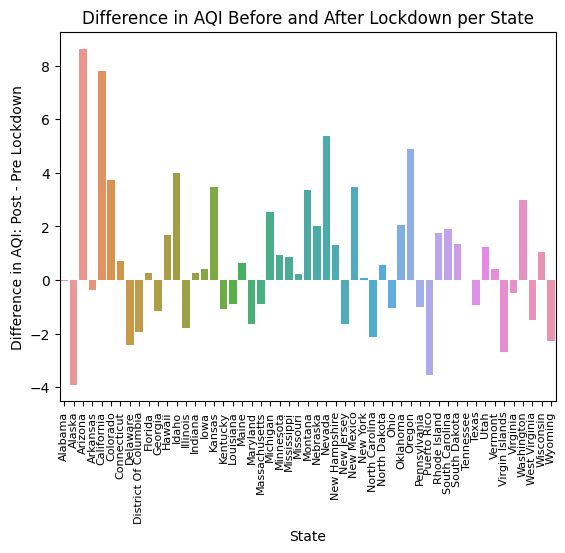

In [47]:
# by state
model_states_df["Difference in AQI: Post - Pre Lockdown"] = model_states_df["Post-Lockdown Mean AQI"] - model_states_df["Pre-Lockdown Mean AQI"]
my_plot = sns.barplot(data=model_states_df, y="Difference in AQI: Post - Pre Lockdown", x="State")
plt.title("Difference in AQI Before and After Lockdown per State")
plt.xticks(rotation=90, fontsize=8)
plt.show()

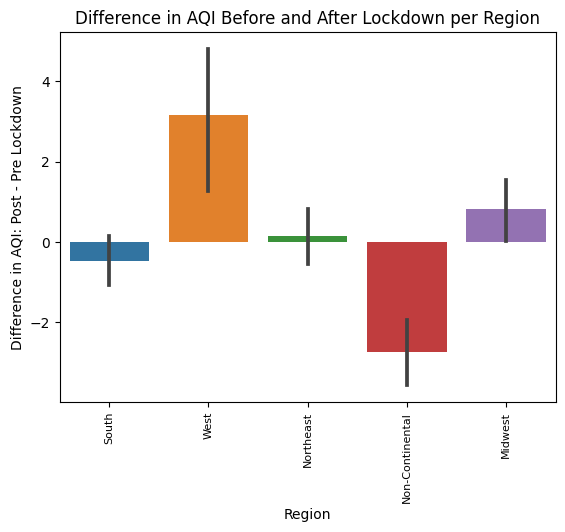

In [48]:
# by region
model_states_df["Difference in AQI: Post - Pre Lockdown"] = model_states_df["Post-Lockdown Mean AQI"] - model_states_df["Pre-Lockdown Mean AQI"]
my_plot = sns.barplot(data=model_states_df, y="Difference in AQI: Post - Pre Lockdown", x="Region")
plt.title("Difference in AQI Before and After Lockdown per Region")
plt.xticks(rotation=90, fontsize=8)
plt.show()

It's hard to see if there truly is a difference in air quality before and after the pandemic for each state. We'll see if the data is normally distributed to see what statistical test we are going to use:

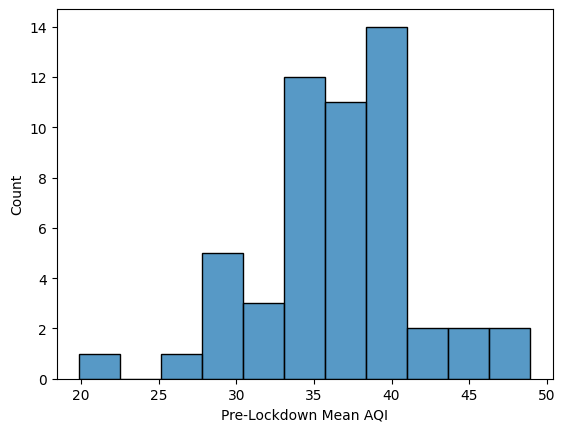

In [49]:
pre_lockdown_histplot = sns.histplot(data=model_states_df, x="Pre-Lockdown Mean AQI")
plt.show()

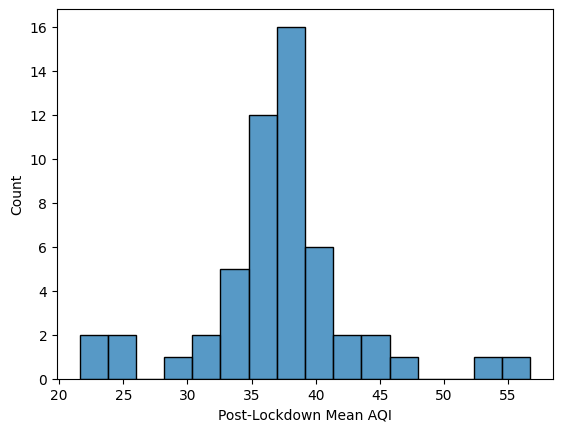

In [50]:
post_lockdown_histplot = sns.histplot(data=model_states_df, x="Post-Lockdown Mean AQI")

The data is roughly normally distributed pre and post lockdown, so we can use a paired t-test.

This is a great test to use becaue we have different AQI measurements for the same locations.

In [52]:
import scipy
pre = model_states_df["Pre-Lockdown Mean AQI"]
post = model_states_df["Post-Lockdown Mean AQI"]
print(scipy.stats.ttest_rel(pre, post))

TtestResult(statistic=-1.9567569575451778, pvalue=0.05575539959267048, df=52)


With a p-value of 0.0557, and an α = 0.05, p > α, thus there is not a statistically significant difference in the AQI pre and post-lockdown for each of the individual states.

**Section III.ii**

Now, we're going to see when the lockdown was first initiated for about the first month:

In [53]:
# covid lockdowns were roughly at least a month long for US states:
# https://en.wikipedia.org/wiki/COVID-19_lockdowns

mid_lockdown_df = aqi_2020_df.loc[(aqi_2020_df["Date"]>="2020-03-13") & (aqi_2020_df["Date"]<="2020-04-13")]
mid_lockdown_mean_aqi = calculate_aqi_stats(mid_lockdown_df)[0]
model_states_df["Mid-Lockdown Mean AQI"] = mid_lockdown_mean_aqi
model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021,2019 Mean AQI per State,2020 Mean AQI per State,2021 Mean AQI per State,2019 Total AQI per State,2020 Total AQI per State,2021 Total AQI per State,2019 Number of Reports per State,2020 Number of Reports per State,2021 Number of Reports per State,Pre-Lockdown Mean AQI,Post-Lockdown Mean AQI,Difference in AQI: Post - Pre Lockdown,Mid-Lockdown Mean AQI
0,Alabama,1.0,South,7708,0.075836,5646,0.075903,40.34,37.39,38.39,199061,162250,111483,4934,4339,2904,39.15,39.10,-0.05,40.38
1,Alaska,2.0,West,885,0.246587,1279,0.220822,29.31,24.31,30.19,72652,56685,29772,2479,2332,986,29.51,25.61,-3.90,24.62
2,Arizona,4.0,West,54006,0.187311,37953,0.145523,45.69,51.79,52.07,215999,243761,183928,4727,4707,3532,45.08,53.72,8.64,48.34
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238,38.53,36.09,40.13,118967,99891,82227,3088,2768,2049,37.50,37.13,-0.37,34.88
4,California,6.0,West,149121,0.082321,100220,0.074207,49.62,58.12,52.29,945900,1119144,602961,19063,19255,11531,48.94,56.75,7.81,39.33


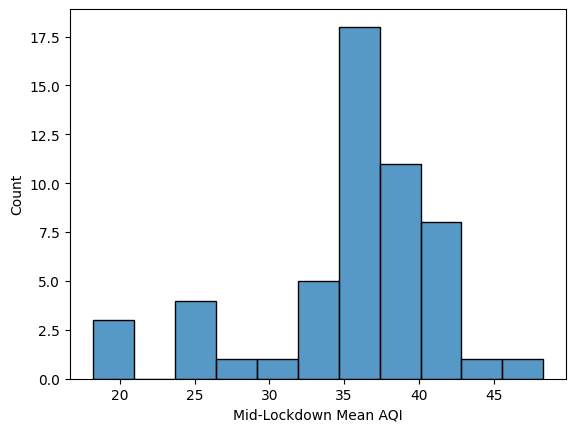

In [54]:
mid_lockdown_histplot = sns.histplot(data=model_states_df, x="Mid-Lockdown Mean AQI")
plt.show()

In [55]:
pre = model_states_df["Pre-Lockdown Mean AQI"]
post = model_states_df["Mid-Lockdown Mean AQI"]
print(scipy.stats.ttest_rel(pre, post))

TtestResult(statistic=2.1735600286759484, pvalue=0.03431438644295199, df=52)


This shows that there is a statistically significant difference between the pre-lockdown and mid-lockdown AQI, as p=0.034 < 0.05.

From the bar plot below, there seemed to have been the biggest differences in the Non-continental US and the Western states.

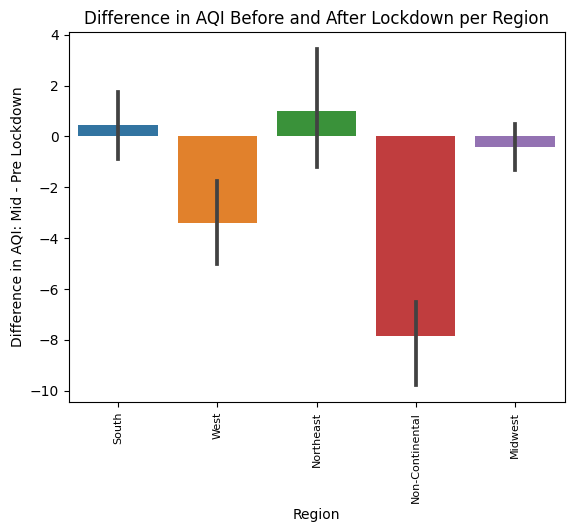

In [56]:
model_states_df["Difference in AQI: Mid - Pre Lockdown"] = model_states_df["Mid-Lockdown Mean AQI"] - model_states_df["Pre-Lockdown Mean AQI"]
my_plot = sns.barplot(data=model_states_df, y="Difference in AQI: Mid - Pre Lockdown", x="Region")
plt.title("Difference in AQI Before and After Lockdown per Region")
plt.xticks(rotation=90, fontsize=8)
plt.show()

**Section III.iii:**

**Question 2:**
- Is there a correlation between Air Quality Index (AQI) and COVID-19 hospitalization rate?

In [57]:
model_states_df.head()

,State,State Code,Region,Hospitalizations 2020,Hospitalization Rate 2020,Hospitalizations 2021,Hospitalization Rate 2021,2019 Mean AQI per State,2020 Mean AQI per State,2021 Mean AQI per State,...,2020 Total AQI per State,2021 Total AQI per State,2019 Number of Reports per State,2020 Number of Reports per State,2021 Number of Reports per State,Pre-Lockdown Mean AQI,Post-Lockdown Mean AQI,Difference in AQI: Post - Pre Lockdown,Mid-Lockdown Mean AQI,Difference in AQI: Mid - Pre Lockdown
0,Alabama,1.0,South,7708,0.075836,5646,0.075903,40.34,37.39,38.39,...,162250,111483,4934,4339,2904,39.15,39.10,-0.05,40.38,1.23
1,Alaska,2.0,West,885,0.246587,1279,0.220822,29.31,24.31,30.19,...,56685,29772,2479,2332,986,29.51,25.61,-3.90,24.62,-4.89
2,Arizona,4.0,West,54006,0.187311,37953,0.145523,45.69,51.79,52.07,...,243761,183928,4727,4707,3532,45.08,53.72,8.64,48.34,3.26
3,Arkansas,5.0,South,9735,0.081084,9072,0.112238,38.53,36.09,40.13,...,99891,82227,3088,2768,2049,37.50,37.13,-0.37,34.88,-2.62
4,California,6.0,West,149121,0.082321,100220,0.074207,49.62,58.12,52.29,...,1119144,602961,19063,19255,11531,48.94,56.75,7.81,39.33,-9.61


We can perform a hypothesis test to see if this correlation is statistically significant, assuming there is no correlation. 

At the same time, we'll calculate our correlation coefficient and plot the data

We'll show **"Hospitalization Rate 2020" vs. "2020 Mean AQI per State"** and **"Hospitalization Rate 2021" vs. "2021 Mean AQI per State"**:

- Null hypothesis: r = 0
- Alternative Hypothesis: r ≠ 0

Equation of line: y = -0.0018976552825427275x  +  0.23360741463502807
Correlation coefficient = -0.059309647853713184
p-value: 0.6731297311162754


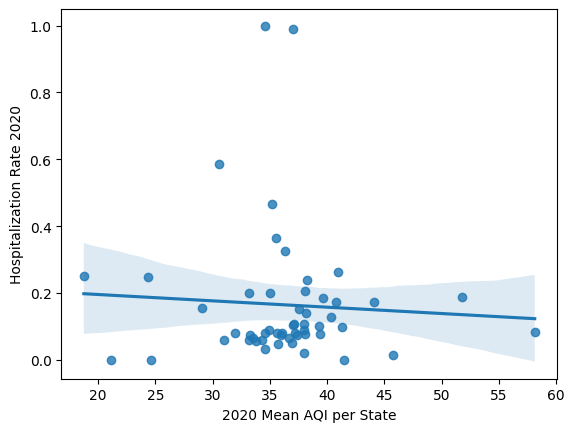

In [58]:
# how to display correlation coefficient: 
# https://www.statology.org/seaborn-regplot-equation/
# https://scales.arabpsychology.com/stats/how-do-i-create-a-seaborn-scatterplot-with-a-correlation-coefficient/

hosp_vs_aqi_2020 = sns.regplot(model_states_df, x="2020 Mean AQI per State", y="Hospitalization Rate 2020")
hosp_vs_aqi_2020.plot()

slope, intercept, r, hosp_vs_aqi_2020, sterr = scipy.stats.linregress(x=hosp_vs_aqi_2020.get_lines()[0].get_xdata(),
                                                       y=hosp_vs_aqi_2020.get_lines()[0].get_ydata())

r, p = scipy.stats.pearsonr(x=model_states_df["2020 Mean AQI per State"], y=model_states_df["Hospitalization Rate 2020"])
print("Equation of line: y =", str(slope) + "x", " + ", intercept)
print("Correlation coefficient =", r)
print("p-value:", p)

Equation of line: y = -0.001130063237719106x  +  0.19066906935229377
Correlation coefficient = -0.02998267625354849
p-value: 0.8312332431866335


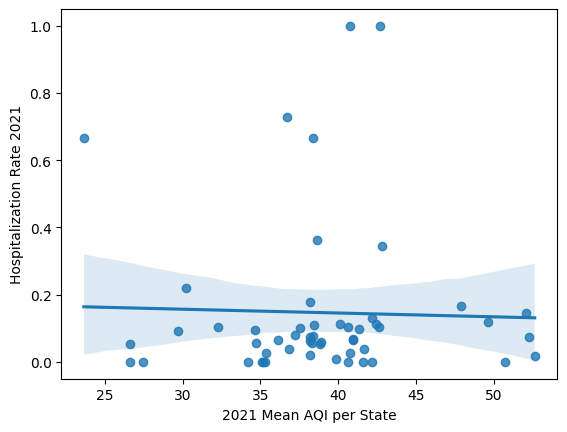

In [59]:
hosp_vs_aqi_2021 = sns.regplot(model_states_df, x="2021 Mean AQI per State", y="Hospitalization Rate 2021")
hosp_vs_aqi_2021.plot()
# how to display correlation coefficient: https://www.statology.org/seaborn-regplot-equation/
slope, intercept, r_coeff, hosp_vs_aqi_2019, sterr = scipy.stats.linregress(x=hosp_vs_aqi_2021.get_lines()[0].get_xdata(),
                                                       y=hosp_vs_aqi_2021.get_lines()[0].get_ydata())

r, p = scipy.stats.pearsonr(x=model_states_df["2021 Mean AQI per State"], y=model_states_df["Hospitalization Rate 2021"])
print("Equation of line: y =", str(slope) + "x", " + ", intercept)
print("Correlation coefficient =", r)
print("p-value:", p)

Both of the values are not less than a threshold α = 0.05, as p = 0.673 > 0.05 and p = 0.831 > 0.05.

Thus, for both of these regression plots, there is not a statistically significant difference between the null hypothesis and the data. Therefore, we can not conclude that Mean AQI for a given year can explain the hospitalization rate for COVID-19 in a given year.

**Section III.iv**

Interestingly enough, however, there is enough statistical evidence for **total number of hospitalizations** to be explained by Mean AQI in a given year:

- Null hypothesis: r = 0
- Alternative Hypothesis: r ≠ 0
 - α = 0.05

Equation of line: y = -0.001130063237719106x  +  0.19066906935229377
Correlation coefficient = 0.5133654112701195
p-value: 8.458721148781487e-05


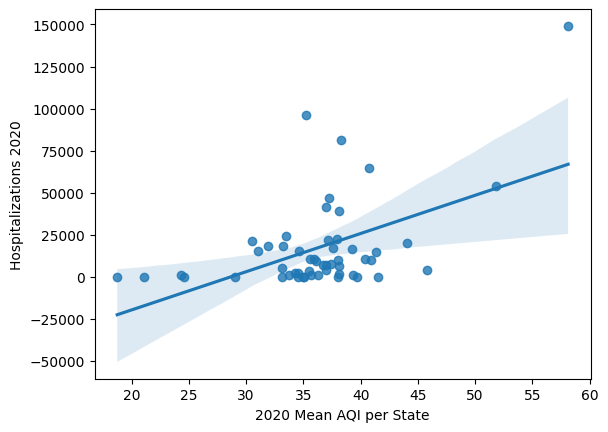

In [60]:
hosp_vs_aqi_2020 = sns.regplot(model_states_df, x="2020 Mean AQI per State", y="Hospitalizations 2020")
hosp_vs_aqi_2020.plot()
# how to display correlation coefficient: https://www.statology.org/seaborn-regplot-equation/
slope, intercept, r_coeff, hosp_vs_aqi_2019, sterr = scipy.stats.linregress(x=hosp_vs_aqi_2021.get_lines()[0].get_xdata(),
                                                       y=hosp_vs_aqi_2021.get_lines()[0].get_ydata())

r, p = scipy.stats.pearsonr(x=model_states_df["2020 Mean AQI per State"], y=model_states_df["Hospitalizations 2020"])
print("Equation of line: y =", str(slope) + "x", " + ", intercept)
print("Correlation coefficient =", r)
print("p-value:", p)

Equation of line: y = 907.4456202541011x  +  -23017.26699286179
Correlation coefficient = 0.3049595813044145
p-value: 0.026392705172564108


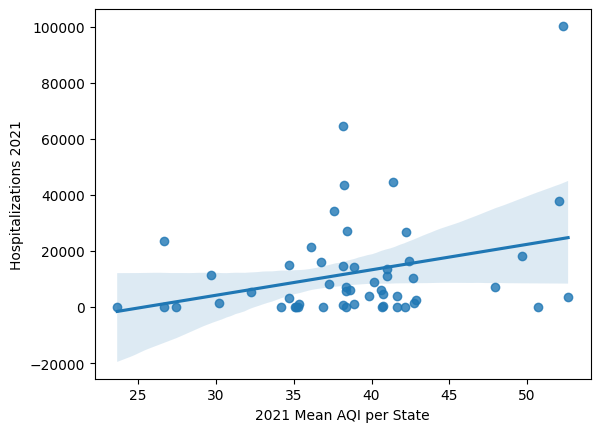

In [61]:
hosp_vs_aqi_2021 = sns.regplot(model_states_df, x="2021 Mean AQI per State", y="Hospitalizations 2021")
hosp_vs_aqi_2021.plot()
# how to display correlation coefficient: https://www.statology.org/seaborn-regplot-equation/
slope, intercept, r_coeff, hosp_vs_aqi_2019, sterr = scipy.stats.linregress(x=hosp_vs_aqi_2021.get_lines()[0].get_xdata(),
                                                       y=hosp_vs_aqi_2021.get_lines()[0].get_ydata())

r, p = scipy.stats.pearsonr(x=model_states_df["2021 Mean AQI per State"], y=model_states_df["Hospitalizations 2021"])
print("Equation of line: y =", str(slope) + "x", " + ", intercept)
print("Correlation coefficient =", r)
print("p-value:", p)

Both of these plots show have a p-value < 0.05, thus there is a statistically significant difference between the null hypothesis and the data. Thus, we reject the null hypothesis and say that there is a correlation between the "Mean AQI per State" for the years 2020 & 2021 and the number of "Hospitalizations" for the years 2020 & 2021, respectively.

## IV: Conclusions ##

There were some statistically significant differences in some of the statistics before and after the lockdown.

Hospitalizations were seemed to increase at the same time as the Mean AQI did, but hospitalization rates did not seem to be explained the same way.

There was only a temporary decrease in the AQI for each state/region due to the lockdowns. If anybody were to be interested in making long-term changes, I'd imagine they'd have to take a pretty innovative route to do so.